<a href="https://colab.research.google.com/github/bdanver/machine_learning/blob/master/projects/crate_and_barrel_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost

In [ ]:
# divide into training and testing sets
product_train = pd.read_csv('https://raw.githubusercontent.com/bdanver/playground/master/train.csv')
product_train.set_index('id', inplace=True)

product_test = pd.read_csv('https://raw.githubusercontent.com/bdanver/playground/master/test.csv')
product_test.set_index('id', inplace=True)

In [ ]:
# view product test columns
product_test.columns

Index(['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7',
       'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13',
       'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31',
       'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37',
       'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43',
       'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48', 'feat_49',
       'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55',
       'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61',
       'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67',
       'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_73',
       'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79',
       'feat_80', 'feat_81', 'feat_82', 'feat_83'

In [ ]:
# view train dataset 
print(product_train.shape)
print(product_train.columns)
print(product_train.info())

(61878, 94)
Index(['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7',
       'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13',
       'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31',
       'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37',
       'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43',
       'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48', 'feat_49',
       'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55',
       'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61',
       'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67',
       'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_73',
       'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79',
       'feat_80', 'feat_81', 'feat_82

In [ ]:
# view the contents of a feat column 
product_train.feat_7.unique()

array([ 0,  5,  1,  2,  4,  3,  6,  7, 18, 10, 19,  8,  9, 16, 11, 15, 12,
       13, 29, 22, 14, 21, 27, 20, 17, 38, 31, 30, 26, 32])

In [ ]:
# collect only the features names of columns 
features = list(product_train)
features.remove('target')

In [ ]:
# define train features and labels
# define test features 
train_x = product_train[features]
train_y = product_train['target']

test_x = product_test[features]

In [ ]:
# grid search of hyperparameters 
param_grid = [
    {'n_estimators': [50, 100, 150, 200],
     'max_depth': [2,4,6,8],
     'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     'min_child_weight' : [ 1, 3, 5, 7 ],
     'gamma'            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
    }
  ]

In [ ]:
# create xgboost classifier with support for gpu 
params = {'tree_method':'gpu_hist', 'predictor':'gpu_predictor' }
model = xgboost.XGBClassifier(**params)

In [ ]:
# create 5 combinations of the hyperparam grid search 
param_comb = 5
folds=5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=param_comb,  n_jobs=-1, 
                                   cv=skf.split(train_x, train_y), verbose=3)

In [ ]:
# fit the model with the combinations of hyperparameters 
%%time 
grid_result = random_search.fit(train_x, train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.3min finished


CPU times: user 11 s, sys: 3.99 s, total: 15 s
Wall time: 5min 32s


In [ ]:
# identify best parameters 
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.15,
 'max_depth': 8,
 'min_child_weight': 7,
 'n_estimators': 150}

In [ ]:
# calculate the predictions using the best parameters 
predictions = random_search.best_estimator_.predict_proba(test_x)
predictions

array([[3.0569665e-04, 1.1835359e-01, 1.5384839e-01, ..., 6.4310757e-03,
        6.1845599e-04, 1.4686563e-04],
       [4.6739234e-03, 8.9988718e-03, 2.1442429e-03, ..., 4.6042860e-03,
        3.0113226e-01, 1.3996647e-03],
       [3.9314906e-05, 1.0831166e-05, 1.4837452e-05, ..., 3.4873254e-05,
        3.4071004e-04, 3.3431294e-05],
       ...,
       [6.1516487e-04, 6.3537306e-01, 2.9189196e-01, ..., 4.5699738e-03,
        8.1803714e-04, 6.9251968e-05],
       [6.6895928e-04, 2.8506878e-01, 3.3498533e-02, ..., 6.1671453e-04,
        7.2001560e-05, 4.5267225e-05],
       [2.7564695e-04, 5.2461374e-01, 4.1124716e-01, ..., 3.6302403e-02,
        3.0817676e-04, 2.5719657e-04]], dtype=float32)

In [ ]:
# convert to kaggle file the predictions 
df = pd.DataFrame(predictions)
df.index += 1 
df.index.name = 'id'
df.columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']
df

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,0.000306,0.118354,0.153848,0.719565,5.877643e-05,0.000673,0.006431,0.000618,0.000147
2,0.004674,0.008999,0.002144,0.000725,3.441717e-04,0.675977,0.004604,0.301132,0.001400
3,0.000039,0.000011,0.000015,0.000008,5.358532e-07,0.999517,0.000035,0.000341,0.000033
4,0.000371,0.685083,0.306388,0.007035,3.562203e-05,0.000171,0.000176,0.000278,0.000463
5,0.020843,0.000141,0.000417,0.000101,9.691791e-05,0.002649,0.001005,0.013524,0.961223
...,...,...,...,...,...,...,...,...,...
144364,0.612585,0.017101,0.010389,0.007420,1.313776e-04,0.276856,0.033605,0.018869,0.023043
144365,0.000938,0.261254,0.524236,0.097303,3.522842e-04,0.002577,0.112634,0.000334,0.000372
144366,0.000615,0.635373,0.291892,0.065742,8.842658e-05,0.000832,0.004570,0.000818,0.000069


In [ ]:
# convert data frame to csv file 
df.to_csv('final_1.csv')

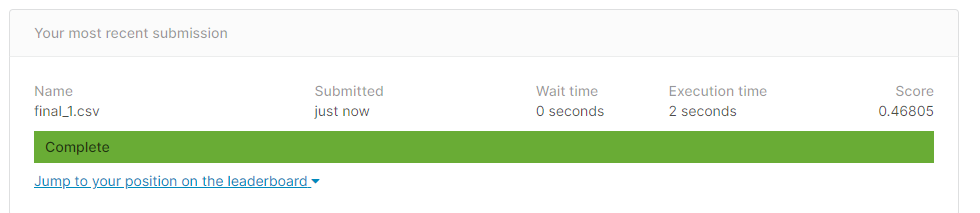

###Solution Explanation
The submissions on Kaggle are evaluated using the multi-class logarithmic loss. The XGBoost classifier was used because of its relatively fast execution speed, its additive algorithm is relevant to the dataset, and most data scientists recommend it as their first go-to model. Gradient boosting has classifiers train on the previous classifier's errors, so models will continue to be added until the final model can not be improved. The hyperparameters selected in the gridsearch were based on previous labs and also research on the most common parameters used for hypertuning. The model was fitted using a combination of hyperparameters. Since the process of fitting the model takes approximately ~5 minutes, I didn't add more XGBoost parameters or increase the param_combinations/folds values because the time would have escalated, as shown below. The prediction results were practically the same compared to the quicker model.

In [ ]:
param_grid = [
    {'n_estimators': [50, 100, 150, 200],
     'max_depth': [2,4,6,8],
     'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     'min_child_weight' : [ 1, 3, 5, 7 ],
     'gamma'            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ],
     'eta'              : [ 0.3, 0.7, 0.2],
    }
  ]

params = {'tree_method':'gpu_hist', 'predictor':'gpu_predictor', 'multi':'softprob', 'num_class':'9' }
model = xgboost.XGBClassifier(**params)

IMAGE

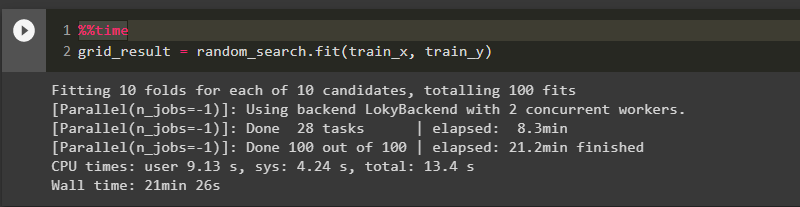

After the model was fitted, the best parameters that produced the least errors were used in the final model. The test data was evaluated and the probabilities of a product belonging to a class were calculated. The probabilities were stored in a .csv file and uploaded to Kaggle for scoring. In summary, I selected XGBoost as the classifier type, and used grid search for tuning hyperparameters. 


I have neither given nor received any unauthorized info on this project. -Bridget Danver